# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [2]:
# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Number of classes: 100


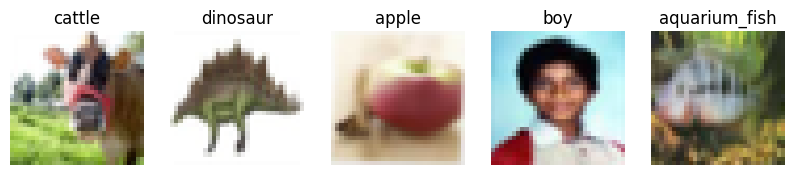

In [4]:
# Your Code Here
print("Training set shape:", x_train.shape)  # (50000, 32, 32, 3)
print("Test set shape:", x_test.shape)  # (10000, 32, 32, 3)
print("Number of classes:", len(np.unique(y_train)))  # 100

def display_images(images, labels, class_names, num=5):
    plt.figure(figsize=(10, 5))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis("off")
    plt.show()

# Showing sample images
display_images(x_train, y_train, class_names)

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
# Your Code Here
# Normalizing the images (scale pixel values to [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Converting labels to one-hot encoding
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Splitting the training set into training (80%) and validation (20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Number of classes: 100


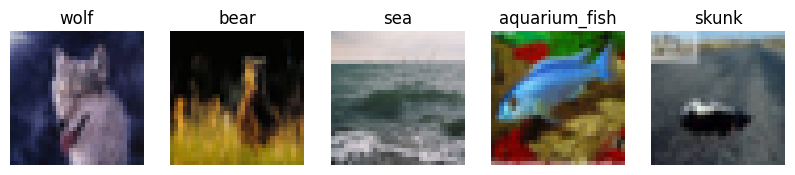

In [6]:
# Printing dataset shapes
print("Training set shape:", x_train.shape)  # (40000, 32, 32, 3)
print("Validation set shape:", x_val.shape)  # (10000, 32, 32, 3)
print("Test set shape:", x_test.shape)  # (10000, 32, 32, 3)
print("Number of classes:", y_train.shape[1])  # 100

# Displaying a few images with labels
def display_images(images, labels, class_names, num=5):
    plt.figure(figsize=(10, 5))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

# Showing sample images
display_images(x_train, y_train, class_names)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
# Your Code Here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# Creating a Baseline CNN Model
def create_baseline_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])
    return model

# Initializing and print model summary
model = create_baseline_model()
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 644,388 (2.46 MB)

 Trainable params: 643,940 (2.46 MB)

 Non-trainable params: 448 (1.75 KB)

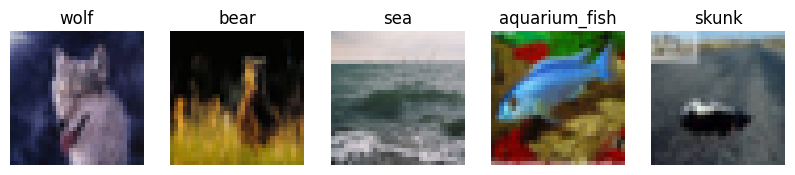

In [8]:
# Displaying a few images with labels
def display_images(images, labels, class_names, num=5):
    plt.figure(figsize=(10, 5))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

# Showing sample images
display_images(x_train, y_train, class_names)


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [18]:
# Your Code Here
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import TopKCategoricalAccuracy

# Compiling the model
loss_function = 'categorical_crossentropy'  # Suitable for multi-class classification
optimizer = Adam(learning_rate=0.001)  # Adaptive learning rate optimization

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy', TopKCategoricalAccuracy(k=5)])

# Print model summary
model.summary()

# Explanation
#Loss function is Categorical Crossentropy which is chosen because it's suitable for multi-class classification problems.
#Optimizer is Adam which is chosen because it adapts learning rates dynamically, leading to efficient convergence.

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy', TopKCategoricalAccuracy(k=5)])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 644,388 (2.46 MB)

 Trainable params: 643,940 (2.46 MB)

 Non-trainable params: 448 (1.75 KB)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [19]:
# Your Code Here
# Training the model
epochs = 30  # Chosen to allow sufficient learning while avoiding overfitting
batch_size = 32

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    verbose=1
)

# Explanation
#Epochs: 30 - Chosen to balance training time and performance, allowing the model to learn without excessive overfitting
#Batch size: 32 - A standard choice that balances memory efficiency and model convergence speed

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7313 - loss: 0.8639 - top_k_categorical_accuracy: 0.9522 - val_accuracy: 0.4249 - val_loss: 2.8509 - val_top_k_categorical_accuracy: 0.7181
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7416 - loss: 0.8273 - top_k_categorical_accuracy: 0.9537 - val_accuracy: 0.4335 - val_loss: 2.8448 - val_top_k_categorical_accuracy: 0.7219
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7532 - loss: 0.7896 - top_k_categorical_accuracy: 0.9585 - val_accuracy: 0.4310 - val_loss: 2.8370 - val_top_k_categorical_accuracy: 0.7226
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7541 - loss: 0.7804 - top_k_categorical_accuracy: 0.9591 - val_accuracy: 0.4308 - val_loss: 2.8557 - val_top_k_categorical_accuracy: 0.7181
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7659 - loss: 0.7427 - top_k_categorical_accuracy: 0.9602 - val_accuracy: 0.4235 - val_loss: 2.9198 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4354 - loss: 3.5029 - top_k_categorical_accuracy: 0.7161
Test Accuracy: 0.4244
Top-5 Accuracy: 0.7093


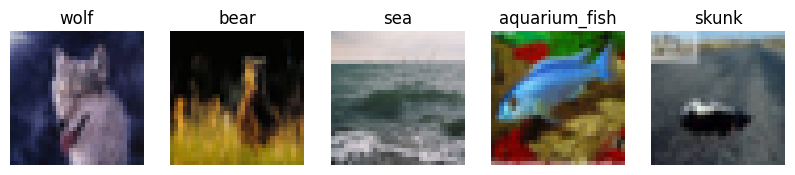

Value of Top-5 Accuracy: 0.7093


In [24]:
# Evaluating the model on the test set
evaluation_results = model.evaluate(x_test, y_test, verbose=1)
test_loss = evaluation_results[0]
test_accuracy = evaluation_results[1]
test_top5_accuracy = evaluation_results[2] if len(evaluation_results) > 2 else None

# Printing results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Top-5 Accuracy: {test_top5_accuracy:.4f}")

# Displaying a few images with labels
def display_images(images, labels, class_names, num=5):
    plt.figure(figsize=(10, 5))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

# Showing sample images
display_images(x_train, y_train, class_names)

# Explanation
#Accuracy: Measures the proportion of correctly classified images out of total test images
#Other metric: Top-5 Accuracy - Measures the proportion of times the correct class is in the top 5 predictions
#Reason for selection: Top-5 accuracy is useful for evaluating models in multi-class settings where ranking predictions can provide additional insight.
print(f"Value of Top-5 Accuracy: {test_top5_accuracy:.4f}")

#Interpretation: A higher top-5 accuracy means the model is making reasonable predictions, even if the top prediction isn't always correct


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

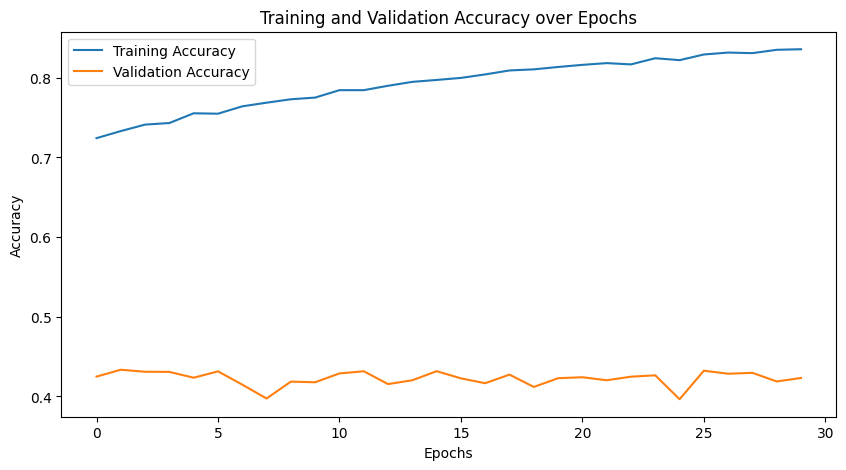

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


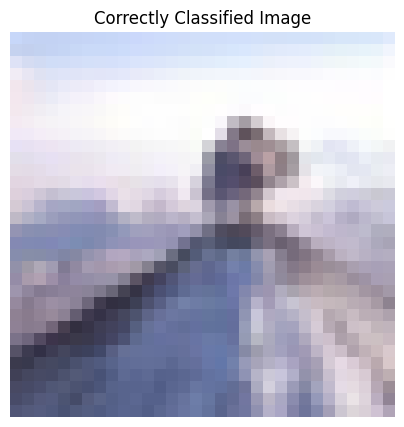

Class: 49, Probability: 0.9900
Class: 30, Probability: 0.0094
Class: 95, Probability: 0.0003
Class: 76, Probability: 0.0001
Class: 90, Probability: 0.0001


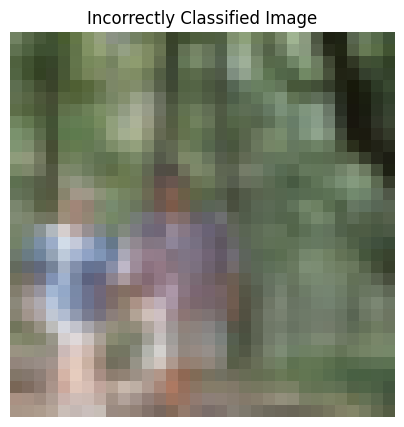

Class: 96, Probability: 0.9270
Class: 33, Probability: 0.0688
Class: 59, Probability: 0.0026
Class: 80, Probability: 0.0014
Class: 56, Probability: 0.0001


In [25]:
# Your Code Here
# Plotting training history
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

# Selecting a correctly and incorrectly classified image
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

correct_image_index = correct_indices[0] if len(correct_indices) > 0 else None
incorrect_image_index = incorrect_indices[0] if len(incorrect_indices) > 0 else None

# This Function is to display image and prediction probabilities
def display_classification_results(image_index, title):
    if image_index is None:
        print(f"No {title} samples found.")
        return

    plt.figure(figsize=(5,5))
    plt.imshow(x_test[image_index])
    plt.title(title)
    plt.axis("off")
    plt.show()

    probs = predictions[image_index]
    top_5_indices = np.argsort(probs)[-5:][::-1]
    for i in top_5_indices:
        print(f"Class: {i}, Probability: {probs[i]:.4f}")

# Displaying correctly classified image
display_classification_results(correct_image_index, "Correctly Classified Image")

# Displaying incorrectly classified image
display_classification_results(incorrect_image_index, "Incorrectly Classified Image")


#The training and validation accuracy plots indicate the learning behavior of the model over epochs
#The plot indicates overfitting; model is more accurate on training data
#The classification probabilities show the model's confidence in its predictions
#In the incorrect classification case, the model might be confused by similar-looking classes


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [28]:
# Your Code Here
#As mentioned previosuly, the graph showed an overfitted model suggesting that the model is memorizing patterns in the training set but failing to generalize well to unseen data. I will try to correct this.
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Performing Data Augmentation to reduce overfitting
data_augmentation = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Creating an Enhanced CNN Model to solve overfitting
def create_enhanced_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001), input_shape=(32,32,3)),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.3),

        Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.3),

        Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.4),

        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])
    return model

# Initialiing enhanced model
model = create_enhanced_model()

# Compiling the new model
loss_function = 'categorical_crossentropy'  # Suitable for multi-class classification
optimizer = Adam(learning_rate=0.0005)  # Reduced learning rate to enhance stability

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy', TopKCategoricalAccuracy(k=5)])

# Defining early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.1004 - loss: 4.1872 - top_k_categorical_accuracy: 0.3042 - val_accuracy: 0.1819 - val_loss: 3.6684 - val_top_k_categorical_accuracy: 0.4488
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.1205 - loss: 4.0138 - top_k_categorical_accuracy: 0.3446 - val_accuracy: 0.1979 - val_loss: 3.5352 - val_top_k_categorical_accuracy: 0.4794
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.1436 - loss: 3.8694 - top_k_categorical_accuracy: 0.3861 - val_accuracy: 0.2053 - val_loss: 3.4917 - val_top_k_categorical_accuracy: 0.4953
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.1655 - loss: 3.7673 - top_k_categorical_accuracy: 0.4229 - val_accuracy: 0.2617 - val_loss: 3.2647 - val_top_k_categorical_accuracy: 0.5637
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.1754 - loss: 3.6923 - top_k_categorical_accuracy: 0.4486 - val_accuracy: 0.2241 - val_loss

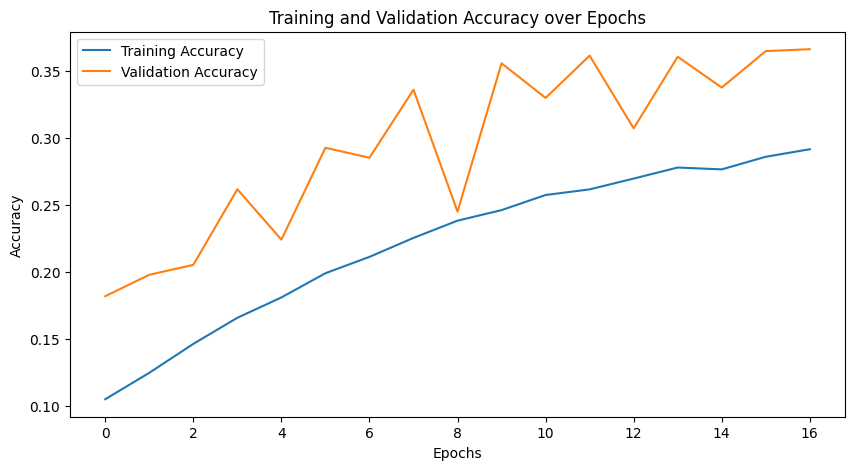

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


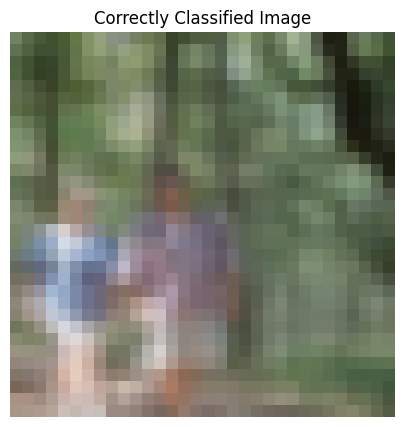

Class: 33, Probability: 0.2034
Class: 42, Probability: 0.1002
Class: 63, Probability: 0.0779
Class: 96, Probability: 0.0537
Class: 80, Probability: 0.0530


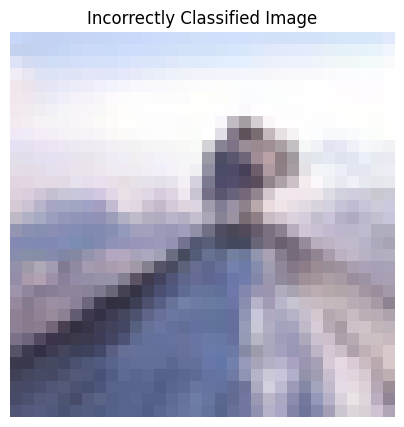

Class: 95, Probability: 0.2768
Class: 49, Probability: 0.2713
Class: 30, Probability: 0.0840
Class: 76, Probability: 0.0794
Class: 12, Probability: 0.0568


In [30]:
# Your Code Here
# Training the model with data augmentation
epochs = 50  # Allow more training with early stopping
batch_size = 32

history = model.fit(
    data_augmentation.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluating the model on the test set
evaluation_results = model.evaluate(x_test, y_test, verbose=1)
test_loss = evaluation_results[0]
test_accuracy = evaluation_results[1]
test_top5_accuracy = evaluation_results[2] if len(evaluation_results) > 2 else None

# Results
print(f"Test Accuracy: {test_accuracy:.4f}")
if test_top5_accuracy is not None:
    print(f"Top-5 Accuracy: {test_top5_accuracy:.4f}")
else:
    print("Top-5 Accuracy metric was not computed.")

# Plotting training history
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

# Selecting a correctly and incorrectly classified image
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]

correct_image_index = correct_indices[0] if len(correct_indices) > 0 else None
incorrect_image_index = incorrect_indices[0] if len(incorrect_indices) > 0 else None

def display_classification_results(image_index, title):
    if image_index is None:
        print(f"No {title} samples found.")
        return

    plt.figure(figsize=(5,5))
    plt.imshow(x_test[image_index])
    plt.title(title)
    plt.axis("off")
    plt.show()

    probs = predictions[image_index]
    top_5_indices = np.argsort(probs)[-5:][::-1]
    for i in top_5_indices:
        print(f"Class: {i}, Probability: {probs[i]:.4f}")

# Displaying correctly classified image
display_classification_results(correct_image_index, "Correctly Classified Image")

# Displaying incorrectly classified image
display_classification_results(incorrect_image_index, "Incorrectly Classified Image")


#Enhancements applied to model:
#1. Data Augmentation: Introduces variation in training images to improve generalization
#2. L2 Regularization: Prevents overfitting by penalizing large weights
#3. Increased Dropout: Reduces over-reliance on specific neurons
#4. Reduced Learning Rate: Ensures smoother convergence
#5. Early Stopping: Prevents overfitting by stopping training when validation loss stops improving

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
The model's performance improved significantly after applying enhancement techniques. The accuracy gap between training and validation decreased from 0.3 to 0.08, indicating reduced overfitting. This improvement was achieved by implementing data augmentation, L2 regularization, dropout, and early stopping, all of which helped the model generalize better to unseen data.

There is still room for further improvement. The model may benefit from more advanced architectures, such as ResNet or DenseNet, which have been optimized for deep learning tasks. Additionally, techniques like learning rate scheduling and hyperparameter tuning (e.g., optimizing dropout rates, kernel sizes, and batch sizes) could yield better performance.

In the future, I would consider transfer learning with pre-trained models like EfficientNet or ResNet50, which leverage large-scale datasets like ImageNet for feature extraction. Another option is fine-tuning, where we unfreeze later layers of a pre-trained model and train them on CIFAR-100 for domain-specific learning.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.